# Laboratory: Introduction to linear regression

The Human Freedom Index is a report that attempts to summarize the idea of “freedom” through a bunch of different variables for many countries around the globe. It serves as a rough objective measure for the relationships between the different types of freedom - whether it’s political, religious, economical or personal freedom - and other social and economic circumstances. The Human Freedom Index is an annually co-published report by the Cato Institute, the Fraser Institute, and the Liberales Institut at the Friedrich Naumann Foundation for Freedom.

In this lab, you’ll be analysing data from the Human Freedom Index reports. Your aim will be to summarize a few of the relationships within the data both graphically and numerically in order to find which variables can help tell a story about freedom.

## Getting Started

### Load packages

Let’s load the packages.

In [165]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from pathlib import Path

sns.set_theme()

### The data

In [166]:
HFI_PATH = Path("../datasets/hfi.csv")

hfi_df = pd.read_csv(HFI_PATH)

print(f"Dimension: {hfi_df.shape}")
print(f"Columns: {', '.join(sorted(hfi_df.columns.values.tolist()))}")

types = hfi_df.dtypes

# Asserting that each row is the hfi for each country for each year
assert hfi_df.shape[0] == hfi_df["year"].nunique() * hfi_df["countries"].nunique()

Dimension: (1458, 123)
Columns: ISO_code, countries, ef_government, ef_government_consumption, ef_government_enterprises, ef_government_tax, ef_government_tax_income, ef_government_tax_payroll, ef_government_transfers, ef_legal, ef_legal_courts, ef_legal_crime, ef_legal_enforcement, ef_legal_gender, ef_legal_integrity, ef_legal_judicial, ef_legal_military, ef_legal_police, ef_legal_protection, ef_legal_restrictions, ef_money, ef_money_currency, ef_money_growth, ef_money_inflation, ef_money_sd, ef_rank, ef_regulation, ef_regulation_business, ef_regulation_business_adm, ef_regulation_business_bribes, ef_regulation_business_bureaucracy, ef_regulation_business_compliance, ef_regulation_business_licensing, ef_regulation_business_start, ef_regulation_credit, ef_regulation_credit_interest, ef_regulation_credit_ownership, ef_regulation_credit_private, ef_regulation_labor, ef_regulation_labor_bargain, ef_regulation_labor_conscription, ef_regulation_labor_dismissal, ef_regulation_labor_firing, e

#### Exercise 1 - What are the dimensions of the dataset? What does each row represent?

We highlighted the dimensions above. Each row is the hfi data for each country for each year from 2008 to 2016.

#### Exercise 2 - The dataset spans a lot of years, but we are only interested in data from year 2016. Filter the data `hfi` data frame for year 2016, select the six variables, and assign the result to a data frame named `hfi_2016`.



In [167]:
hfi_2016_df = hfi_df[hfi_df["year"] == 2016]

#### Exercise 3 - What type of plot would you use to display the relationship between the personal freedom score, `pf_score`, and `pf_expression_control`? Plot this relationship using the variable `pf_expression_control` as the predictor. Does the relationship look linear? If you knew a country’s `pf_expression_control`, or its score out of 10, with 0 being the most, of political pressures and controls on media content, would you be comfortable using a linear model to predict the personal freedom score?

There is a positive linear relationship, so a linear model would be a good choice.

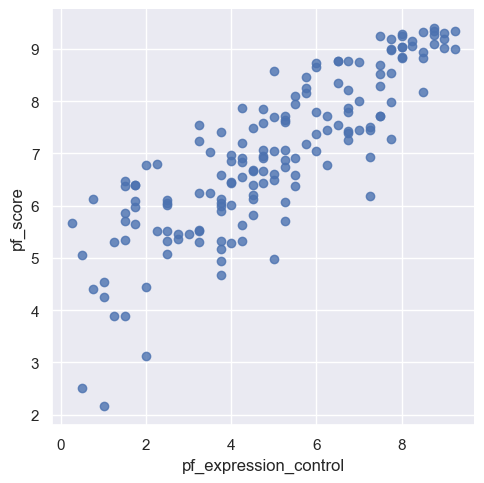

In [168]:
sns.lmplot(x="pf_expression_control", y="pf_score", data=hfi_2016_df, fit_reg=False)

plt.show()

If the relationship looks linear, we can quantify the strength of the relationship with the correlation coefficient.

In [169]:
display(hfi_2016_df[["pf_expression_control", "pf_score"]].corr())

,pf_expression_control,pf_score
pf_expression_control,1.000000,0.845065
pf_score,0.845065,1.000000


## Sum of squared residuals

Think back to the way that we described the distribution of a single variable. Recall that we discussed characteristics such as center, spread, and shape. It’s also useful to be able to describe the relationship of two numerical variables, such as `pf_expression_control` and `pf_score` above.

#### Exercise 4 - Looking at your plot from the previous exercise, describe the relationship between these two variables. Make sure to discuss the form, direction, and strength of the relationship as well as any unusual observations.

It's a linear relatioship, where the correlation between the two variables is strong and positive. There are not outliers.

Just as you’ve used the mean and standard deviation to summarize a single variable, you can summarize the relationship between these two variables by finding the line that best follows their association. 

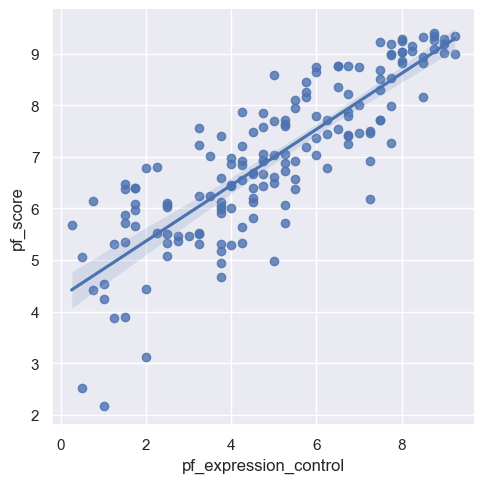

In [170]:
sns.lmplot(x="pf_expression_control", y="pf_score", data=hfi_2016_df, fit_reg=True)

plt.show()

#### Exercise 5 - Run the below function several times. What was the smallest sum of squares that you got? How does it compare to your neighbours?

In [171]:
def simulate_fit_line_ss(x, y, b0, b1, data):
    y_hat = b0 + b1 * data[x]
    return np.sum((data[y] - y_hat) ** 2)

print(f"Simulations: {[simulate_fit_line_ss('pf_expression_control', 'pf_score', b0, b1, hfi_2016_df) for (b0, b1) in np.random.random((10, 2)).tolist()]}")

Simulations: [1321.3198070746769, 461.7441317339452, 1861.257735858016, 5399.294821941133, 1318.5421045480634, 1054.5157004812888, 3133.3327977560593, 1054.0955986405884, 5678.88233278842, 3383.687113510762]


## The linear model

It is rather cumbersome to try to get the correct least squares line, i.e. the line that minimizes the sum of squared residuals, through trial and error. Instead, you can use the `statsmodels` package.

In [172]:
import statsmodels.api as sm 

m1 = sm.OLS.from_formula("pf_score ~ pf_expression_control", data=hfi_2016_df).fit()
display(m1.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               pf_score   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     399.7
Date:                Fri, 26 Apr 2024   Prob (F-statistic):           2.31e-45
Time:                        09:22:37   Log-Likelihood:                -192.56
No. Observations:                 162   AIC:                             389.1
Df Residuals:                     160   BIC:                             395.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 4.2838      0.149     28.755      0.000       3.990       4.578
pf_expression_control     0.5418      0.027     19.993      0.000       0.488       0.595
==============================================================================
Omnibus:                        8.290   Durbin-Watson:                   2.165
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                8.069
Skew:                          -0.505   Prob(JB):                       0.0177
Kurtosis:                       3.420   Cond. No.                         13.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

With this table, we can write down the least squares regression line for the linear model:

$$
\hat{pf\_score} = 4.284 + 0.542 \times pf\_expression\_control
$$

This equation tells us two things:

* For countries with a `pf_expression_control` of 0 (those with the largest amount of political pressure on media content), we expect their mean personal freedom score to be 4.28.

* For every 1 unit increase in `pf_expression_control`, we expect a country’s mean personal freedom score to increase 0.542 units.

We can assess model fit using $R^2$, the proportion of variability in the response variable that is explained by the explanatory variable.

In [173]:
m1.rsquared

0.7141342430049267

For this model, $71.4\%$ of the variability in `pf_score` is explained by `pf_expression_control`.

#### Exercise 6 - Fit a new model that uses `pf_expression_control` to predict `hf_score`, or the total human freedom score. Using the estimates, write the equation of the regression line. What does the slope tell us in the context of the relationship between human freedom and the amount of political pressure on media content?

In [174]:
m2 = sm.OLS.from_formula("hf_score ~ pf_expression_control", data=hfi_2016_df).fit()
display(m2.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               hf_score   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     271.4
Date:                Fri, 26 Apr 2024   Prob (F-statistic):           2.73e-36
Time:                        09:22:37   Log-Likelihood:                -161.43
No. Observations:                 162   AIC:                             326.9
Df Residuals:                     160   BIC:                             333.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 5.0534      0.123     41.109      0.000       4.811       5.296
pf_expression_control     0.3684      0.022     16.475      0.000       0.324       0.413
==============================================================================
Omnibus:                        0.632   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.729   Jarque-Bera (JB):                0.650
Skew:                          -0.148   Prob(JB):                        0.722
Kurtosis:                       2.903   Cond. No.                         13.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$$
\hat{hf\_score} = 5.053 + 0.368 \times pf\_expression\_control
$$

For every 1 unit increase in `pf_expression_control`, we expect a country’s mean human freedom score to increase 0.368 units, while for `pf_expression_control = 0` a country’s mean human freedom score is 5.053.

## Prediction and prediction errors

Let’s create a scatterplot with the least squares line for `m1` laid on top.

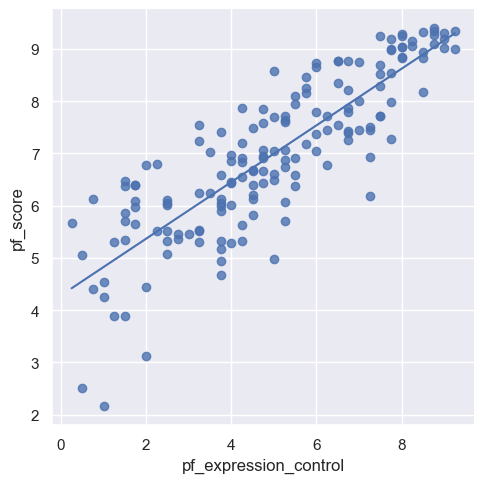

In [175]:
sns.lmplot(x="pf_expression_control", y="pf_score", data=hfi_2016_df, fit_reg=False)
sns.lineplot(x="pf_expression_control", y=m1.fittedvalues, data=hfi_2016_df)

plt.show()

This line can be used to predict `y` at any value of `x`. When predictions are made for values of x that are beyond the range of the observed data, it is referred to as _extrapolation_ and is not usually recommended. However, predictions made within the range of the data are more reliable. They’re also used to compute the residuals.

#### Exercise 7 - If someone saw the least squares regression line and not the actual data, how would they predict a country’s personal freedom school for one with a 3 rating for `pf_expression_control`? Is this an overestimate or an underestimate, and by how much? In other words, what is the residual for this prediction?

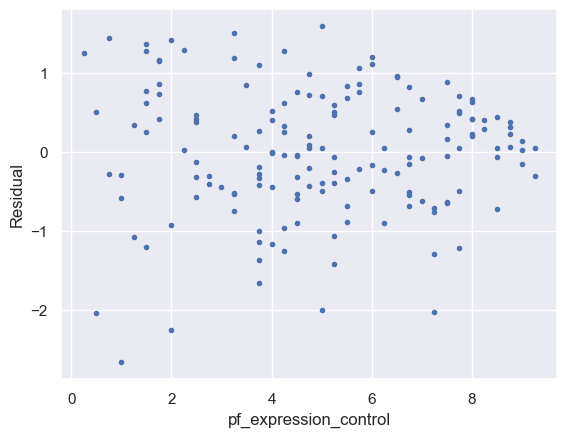

In [176]:
plt.plot(hfi_2016_df["pf_expression_control"], m1.resid, ".")
plt.xlabel("pf_expression_control")
plt.ylabel("Residual")

plt.show()

The residual would be between $-1$ and $0$. So we would be underestimating.

## Model diagnostics

To assess whether the linear model is reliable, we need to check for (1) linearity, (2) nearly normal residuals, and (3) constant variability.

In order to do these checks we need access to the fitted (predicted) values and the residuals. 

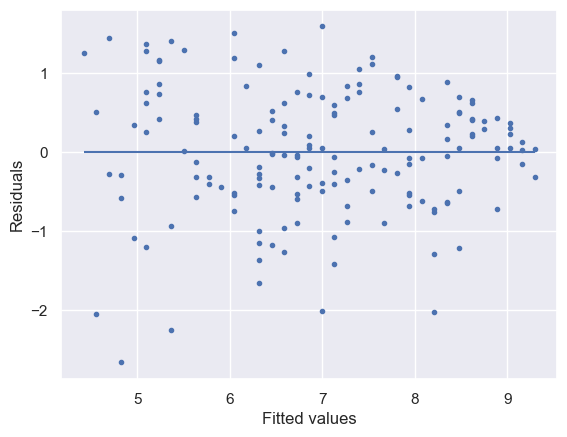

In [177]:
plt.plot(m1.fittedvalues, m1.resid, ".")
plt.hlines(y=0, xmin=m1.fittedvalues.min(), xmax=m1.fittedvalues.max())
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

plt.show()

__Linearity__: You already checked if the relationship between pf_score and pf_expression_control is linear using a scatterplot. We should also verify this condition with a plot of the residuals vs. fitted (predicted) values.

#### Exercise 8 - Is there any apparent pattern in the residuals plot? What does this indicate about the linearity of the relationship between the two variables?

Since the plot does not show any trend, we can see how the two variables might relate in a linear model.

__Nearly normal residuals__: To check this condition, we can look at a histogram of the residuals.

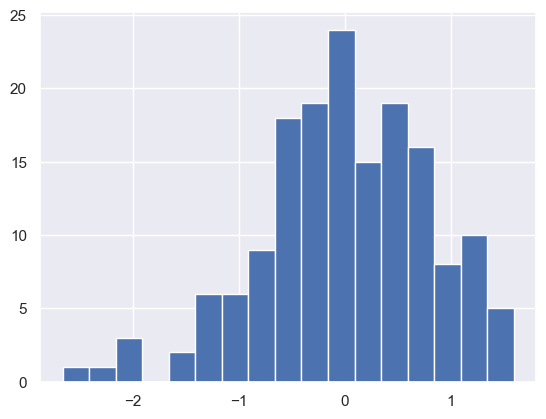

In [178]:
plt.hist(m1.resid, bins=np.arange(min(m1.resid), max(m1.resid) + 0.25, 0.25))

plt.show()

### Exercise 9 - Based on the histogram, does the nearly normal residuals condition appear to be violated? Why or why not?

The normality condition seems to be met as residuals appear to be normally distributed.

__Constant variability:__

#### Exercise 10 - Based on the residuals vs. fitted plot, does the constant variability condition appear to be violated? Why or why not?

There is no difference in variability between residuals, hence this condition is met too.

## More Practice

1. Choose another variable that you think would strongly correlate with pf_score. Produce a scatterplot of the two variables and fit a linear model. At a glance, does there seem to be a linear relationship?
Let's try to use `hf_rank` as a predictor.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               hf_score   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     3474.
Date:                Fri, 26 Apr 2024   Prob (F-statistic):          2.04e-110
Time:                        09:22:38   Log-Likelihood:                 11.179
No. Observations:                 162   AIC:                            -18.36
Df Residuals:                     160   BIC:                            -12.18
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.7153      0.036    243.789      0.000       8.645       8.786
hf_rank       -0.0225      0.000    -58.940      0.000      -0.023      -0.022
==============================================================================
Omnibus:                      110.454   Durbin-Watson:                   2.150
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              833.306
Skew:                          -2.483   Prob(JB):                    1.12e-181
Kurtosis:                      12.939   Cond. No.                         188.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

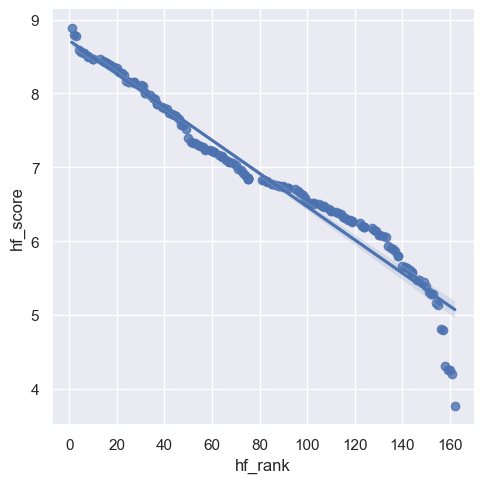

In [179]:
m3 = sm.OLS.from_formula("hf_score ~ hf_rank", data=hfi_2016_df).fit()
display(m3.summary())
sns.lmplot(x="hf_rank", y="hf_score", data=hfi_2016_df)

plt.show()

We see that there is a very strong negative linear relationship.

2. How does this relationship compare to the relationship between `pf_score` and `pf_expression_control`? Use the $R^2$ values from the two model summaries to compare. Does your independent variable seem to predict `pf_score` better? Why or why not? We see that 95.6% of the variance is explained by our model, so the `hf_rank` is a better predictor.

3. Check the model diagnostics using appropriate visualisations and evaluate if the model conditions have been met.

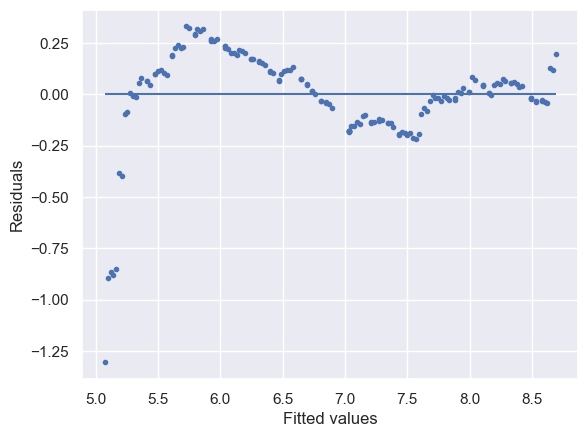

In [180]:
plt.plot(m3.fittedvalues, m3.resid, ".")
plt.hlines(y=0, xmin=m3.fittedvalues.min(), xmax=m3.fittedvalues.max())
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

plt.show()

Despite constant variabily is seemingly violated, we can accept it.

Let's see how residuals are distributed.

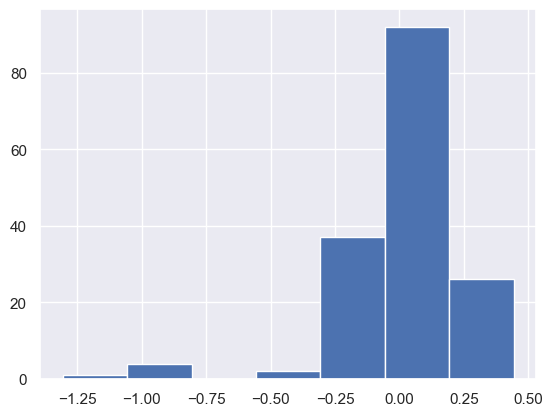

In [181]:
plt.hist(m3.resid, bins=np.arange(min(m3.resid), max(m3.resid) + 0.25, 0.25))

plt.show()

4. Pick another pair of variables of interest and visualise the relationship between them. Do you find the relationship surprising or is it what you expected. Discuss why you were interested in these variables and why you were/were not surprised by the relationship you observed.

Let's see the correlation between the variables by glancing at the correlation matrix.

In [200]:
decimal_cols = hfi_2016_df.columns[hfi_2016_df.dtypes == "float"].values.tolist()

corr_mat = hfi_2016_df[decimal_cols].corr()

display(corr_mat)

,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,pf_ss_disappearances_violent,pf_ss_disappearances_organized,pf_ss_disappearances_fatalities,pf_ss_disappearances_injuries,...,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
pf_rol_procedural,1.000000,0.844379,0.870966,0.955145,0.273914,0.450852,0.232584,0.687247,0.271349,0.128418,...,0.681962,0.103104,0.386439,0.630105,0.555944,0.613883,-0.676813,0.867899,-0.854314,-0.820189
pf_rol_civil,0.844379,1.000000,0.921789,0.952339,0.307580,0.347188,0.182983,0.581685,0.228730,0.106078,...,0.804052,0.276596,0.476753,0.746607,0.607184,0.595421,-0.632462,0.758505,-0.727111,-0.692152
pf_rol_criminal,0.870966,0.921789,1.000000,0.967057,0.439515,0.308258,0.157400,0.595871,0.177421,0.061969,...,0.834668,0.252081,0.499517,0.755654,0.651844,0.622018,-0.645826,0.756691,-0.726697,-0.699570
pf_rol,0.955145,0.952339,0.967057,1.000000,0.358731,0.467296,0.336108,0.687337,0.398011,0.317016,...,0.774263,0.165527,0.520763,0.741642,0.685275,0.727217,-0.755054,0.839785,-0.821725,-0.783751
pf_ss_homicide,0.273914,0.307580,0.439515,0.358731,1.000000,0.099415,-0.037528,0.176943,0.032122,-0.017685,...,0.414600,0.138395,0.272545,0.382418,0.275004,0.273310,-0.258336,0.241869,-0.217318,-0.195007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ef_score,0.613883,0.595421,0.622018,0.727217,0.273310,0.383595,0.299484,0.589969,0.363527,0.280421,...,0.628463,0.280835,0.588619,0.726514,0.816771,1.000000,-0.955901,0.843219,-0.827755,-0.799886
ef_rank,-0.676813,-0.632462,-0.645826,-0.755054,-0.258336,-0.413213,-0.288546,-0.617811,-0.347803,-0.258207,...,-0.644423,-0.219215,-0.536465,-0.690962,-0.759512,-0.955901,1.000000,-0.852808,0.862856,0.847645
hf_score,0.867899,0.758505,0.756691,0.839785,0.241869,0.550291,0.465109,0.755338,0.493988,0.408845,...,0.548866,0.128978,0.453920,0.640839,0.710451,0.843219,-0.852808,1.000000,-0.977737,-0.931063
hf_rank,-0.854314,-0.727111,-0.726697,-0.821725,-0.217318,-0.531795,-0.366864,-0.717286,-0.403978,-0.314740,...,-0.533485,-0.107766,-0.427771,-0.600374,-0.690778,-0.827755,0.862856,-0.977737,1.000000,0.968687


Let's see how the variables correlate with `hf_score`.

In [213]:
import pprint

pprint.pp(corr_mat["hf_score"].sort_values(ascending=False).dropna())


hf_score                   1.000000
pf_score                   0.947549
pf_rol_procedural          0.867899
ef_score                   0.843219
pf_rol                     0.839785
                             ...   
ef_government_transfers   -0.508519
ef_rank                   -0.852808
pf_rank                   -0.928299
hf_quartile               -0.931063
hf_rank                   -0.977737
Name: hf_score, Length: 111, dtype: float64
